<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/Time_series_take_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Packages**

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

## **Loading data**

In [4]:
tickers = ["^GSPC", "^GDAXI", "^FTSE", "^N225"]
data = yf.download(tickers, period="10y")

[*********************100%%**********************]  4 of 4 completed


In [5]:
data.head()

Price         Adj Close                                                Close  \
Ticker            ^FTSE       ^GDAXI        ^GSPC         ^N225        ^FTSE   
Date                                                                           
2014-08-06  6636.200195  9130.040039          NaN           NaN  6636.200195   
2014-08-07  6597.399902  9038.969727  1909.569946  15232.370117  6597.399902   
2014-08-08  6567.399902  9009.320312  1931.589966  14778.370117  6567.399902   
2014-08-11  6632.799805  9180.740234  1936.920044  15130.519531  6632.799805   
2014-08-12  6632.399902  9069.469727  1933.750000  15161.309570  6632.399902   

Price                                                      High               \
Ticker           ^GDAXI        ^GSPC         ^N225        ^FTSE       ^GDAXI   
Date                                                                           
2014-08-06  9130.040039          NaN           NaN  6682.500000  9166.209961   
2014-08-07  9038.969727  1909.569946  15232.370117  6649.100098  9166.040039   
2014-08-08  9009.320312  1931.589966  14778.370117  6597.399902  9061.000000   
2014-08-11  9180.740234  1936.920044  15130.519531  6645.799805  9199.000000   
2014-08-12  9069.469727  1933.750000  15161.309570  6643.700195  9171.940430   

Price       ...          Low                       Open               \
Ticker      ...        ^GSPC         ^N225        ^FTSE       ^GDAXI   
Date        ...                                                        
2014-08-06  ...          NaN           NaN  6682.500000  9084.519531   
2014-08-07  ...  1904.780029  15061.990234  6636.200195  9081.290039   
2014-08-08  ...  1909.010010  14753.839844  6597.399902  8928.190430   
2014-08-11  ...  1933.430054  14973.709961  6567.399902  9106.669922   
2014-08-12  ...  1928.290039  15125.929688  6632.799805  9166.919922   

Price                                       Volume                             \
Ticker            ^GSPC         ^N225        ^FTSE       ^GDAXI         ^GSPC   
Date                                                                            
2014-08-06          NaN           NaN  803798800.0   98898300.0           NaN   
2014-08-07  1923.030029  15138.719727  565630100.0   97954700.0  3.230520e+09   
2014-08-08  1910.349976  15063.730469  645423400.0  102515800.0  2.902280e+09   
2014-08-11  1933.430054  15022.639648  494367000.0   81228900.0  2.784890e+09   
2014-08-12  1935.729980  15164.730469  448281800.0   74774600.0  2.611700e+09   

Price                    
Ticker            ^N225  
Date                     
2014-08-06          NaN  
2014-08-07  143100000.0  
2014-08-08  177200000.0  
2014-08-11  114600000.0  
2014-08-12   89300000.0  

[5 rows x 24 columns]

In [6]:
data = data['Close'].reset_index()

In [7]:
data = data.set_index('Date')
data.head()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2014-08-06,6636.200195,9130.040039,NaN,NaN
2014-08-07,6597.399902,9038.969727,1909.569946,15232.370117
2014-08-08,6567.399902,9009.320312,1931.589966,14778.370117
2014-08-11,6632.799805,9180.740234,1936.920044,15130.519531
2014-08-12,6632.399902,9069.469727,1933.750000,15161.309570


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2604 entries, 2014-08-06 to 2024-08-07
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^FTSE   2526 non-null   float64
 1   ^GDAXI  2537 non-null   float64
 2   ^GSPC   2516 non-null   float64
 3   ^N225   2445 non-null   float64
dtypes: float64(4)
memory usage: 101.7 KB


In [9]:
data.index.dtype

dtype('<M8[ns]')

In [10]:
data.describe()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
count,2526.000000,2537.000000,2516.000000,2445.000000
mean,7074.848179,12963.500310,3202.772950,23947.019102
std,580.196474,2276.215363,992.831278,5881.300624
min,4993.899902,8441.709961,1829.079956,14532.509766
25%,6730.324829,11347.450195,2294.684937,19613.279297
50%,7193.850098,12628.950195,2906.119995,22486.919922
75%,7489.425049,14731.049805,4115.702637,27872.109375
max,8445.799805,18869.359375,5667.200195,42224.019531


In [11]:
data.head()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2014-08-06,6636.200195,9130.040039,NaN,NaN
2014-08-07,6597.399902,9038.969727,1909.569946,15232.370117
2014-08-08,6567.399902,9009.320312,1931.589966,14778.370117
2014-08-11,6632.799805,9180.740234,1936.920044,15130.519531
2014-08-12,6632.399902,9069.469727,1933.750000,15161.309570


In [12]:
data.isna().sum()

Ticker
^FTSE      78
^GDAXI     67
^GSPC      88
^N225     159
dtype: int64

In [13]:
data.asfreq('D').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3655 entries, 2014-08-06 to 2024-08-07
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^FTSE   2526 non-null   float64
 1   ^GDAXI  2537 non-null   float64
 2   ^GSPC   2516 non-null   float64
 3   ^N225   2445 non-null   float64
dtypes: float64(4)
memory usage: 142.8 KB


In [14]:
data.head()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2014-08-06,6636.200195,9130.040039,NaN,NaN
2014-08-07,6597.399902,9038.969727,1909.569946,15232.370117
2014-08-08,6567.399902,9009.320312,1931.589966,14778.370117
2014-08-11,6632.799805,9180.740234,1936.920044,15130.519531
2014-08-12,6632.399902,9069.469727,1933.750000,15161.309570


## **Plotting**

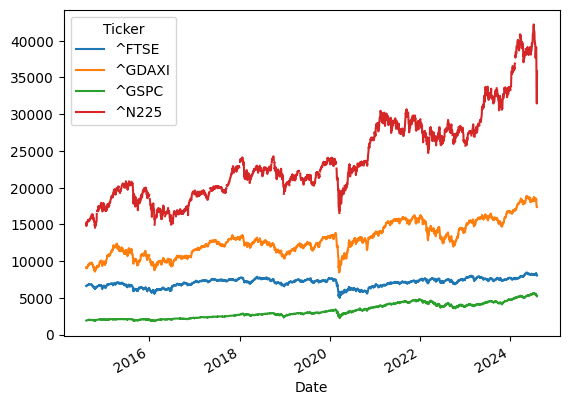

In [16]:
data.plot()
plt.show()

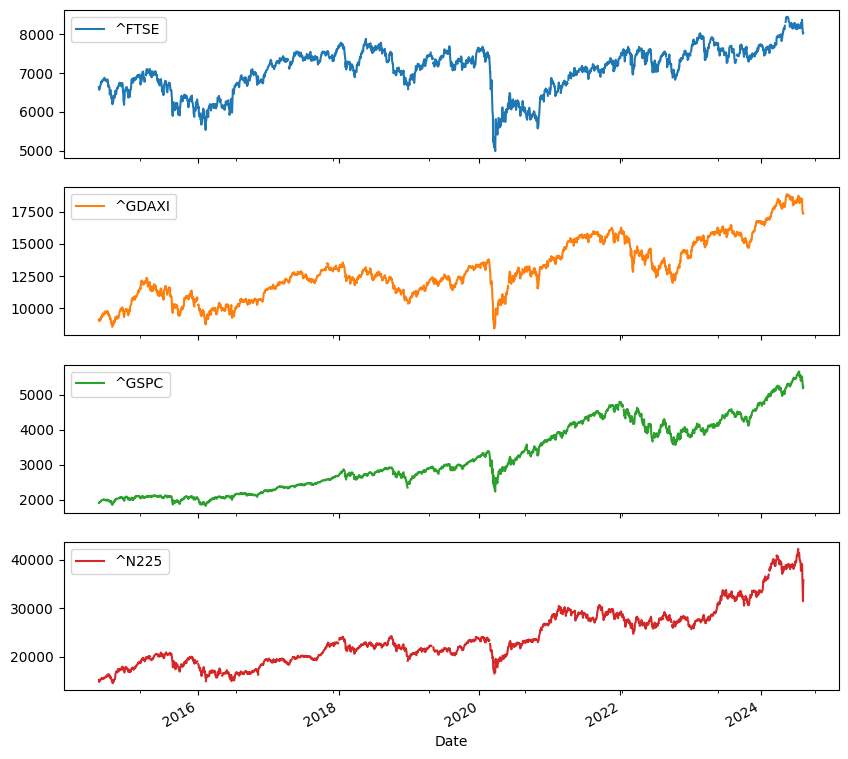

In [17]:
data.plot(subplots=True, figsize=(10, 10))
plt.show()

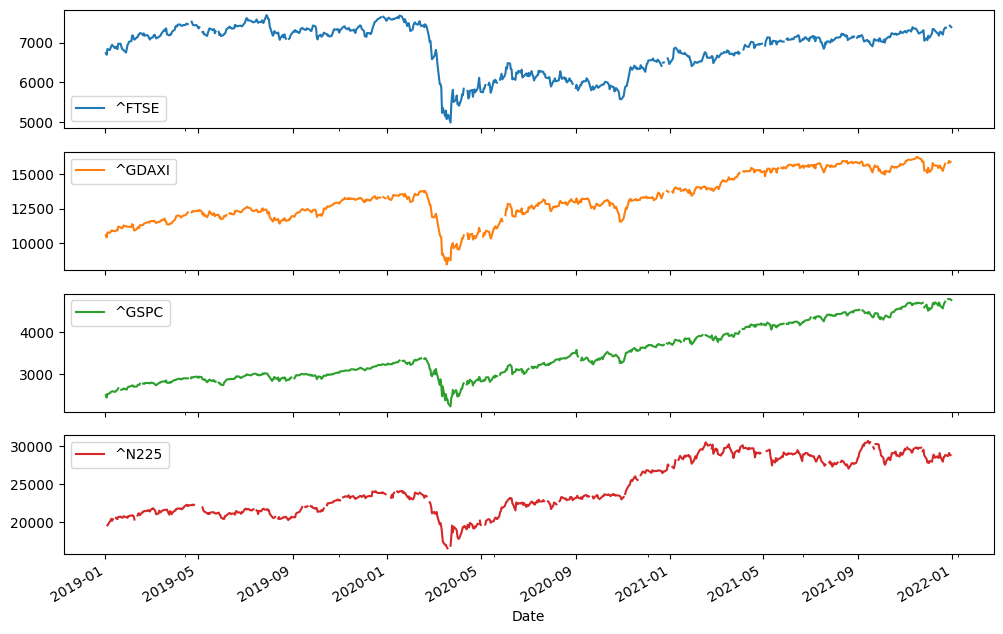

In [18]:
data.loc['2019':'2021'].plot(figsize=(12, 8), subplots=True)
plt.show()

<Axes: xlabel='Date'>

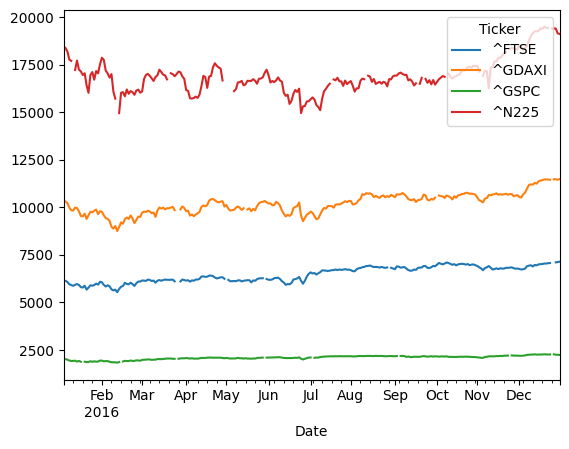

In [19]:
data.loc['2016'].plot()

## **Frequency Setting**

In [20]:
data.asfreq('B').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2611 entries, 2014-08-06 to 2024-08-07
Freq: B
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^FTSE   2526 non-null   float64
 1   ^GDAXI  2537 non-null   float64
 2   ^GSPC   2516 non-null   float64
 3   ^N225   2445 non-null   float64
dtypes: float64(4)
memory usage: 102.0 KB


## **Handling Missingness**

### **1. Forward Fill or Back Fill**

**Method**: propagate the last lnown value forward(forward fill) or use the next available value backward(back fill)

**Pros**: retains the same number of observations but may introduce bias

**Cons**: assumes continuity in the time series

In [21]:
df1 = data.copy()

In [22]:
df1.columns

Index(['^FTSE', '^GDAXI', '^GSPC', '^N225'], dtype='object', name='Ticker')

In [23]:
df1.isna().sum()

Ticker
^FTSE      78
^GDAXI     67
^GSPC      88
^N225     159
dtype: int64

In [30]:
filt_df = df1.loc['2015']

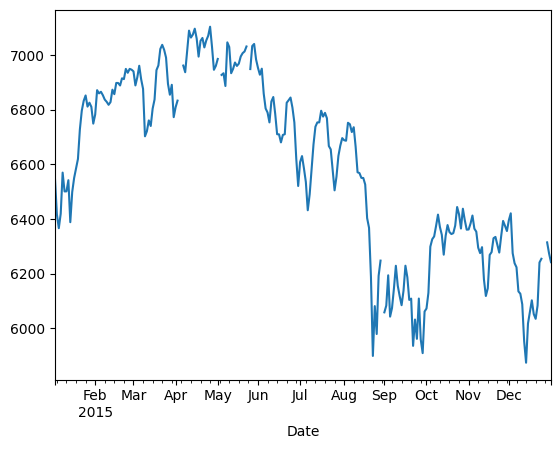

In [31]:
filt_df['^FTSE'].plot()
plt.show()

In [32]:
#Forward fill missig values
filt_df['forward_filled'] = filt_df['^FTSE'].fillna(method='ffill')

<ipython-input-32-783c799b2f5a>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filt_df['forward_filled'] = filt_df['^FTSE'].fillna(method='ffill')


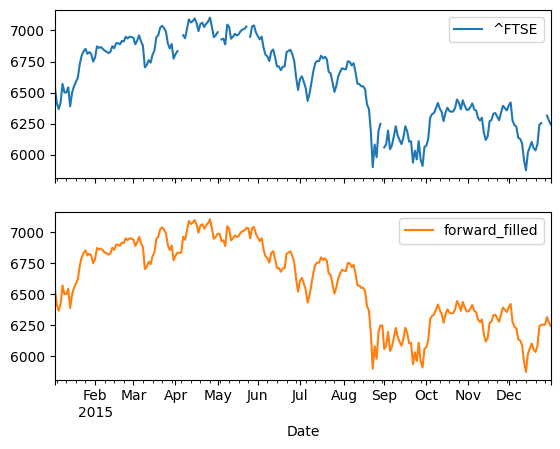

In [33]:
filt_df[['^FTSE', 'forward_filled']].plot(subplots=True)
plt.show()

In [34]:
#Back fill missing values
filt_df['back_filled'] = filt_df['^FTSE'].fillna(method = 'bfill')

<ipython-input-34-b8fa4ae3eef5>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filt_df['back_filled'] = filt_df['^FTSE'].fillna(method = 'bfill')


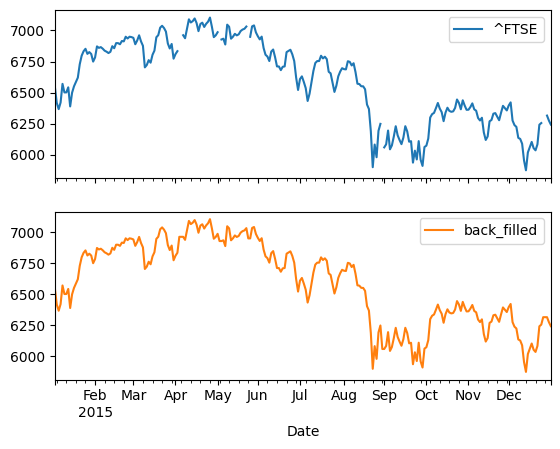

In [35]:
filt_df[['^FTSE', 'back_filled']].plot(subplots=True)
plt.show()

## 2 Interpolation

Method: Use interpolation methods to estimate missing values based on the surrounding data points.

Pros:Provides a more nuanced estimate compared to forward fill ot bacj fill.

Cons: Sensitive to extreme values and outliers

Interpolation is a method used to estimate and fill in missing values in a dataset. When dealing with time series or other ordered data, interpolation involves using the surrounding known values to estimate the missing ones. The idea is to make an educated guess about the missing data points based on the trend or pattern observed in the available data.

There are various interpolation methods, including:

Linear Interpolation: Fills in missing values by connecting the points with a straight line. It assumes that the change between two known values is linear.

Example: If you have values at time points 1 and 3 and you're missing the value at time point 2, linear interpolation would assume a straight line between the values at time points 1 and 3 to estimate the value at time point 2.

Polynomial Interpolation: Uses a polynomial function to estimate the missing values. This can be more accurate than linear interpolation for data with more complex patterns.

Spline Interpolation: A type of polynomial interpolation that uses piecewise polynomials, ensuring smoothness at the boundaries between intervals.

Nearest Neighbor Interpolation: Fills missing values with the nearest available data point's value.

Cubic Interpolation: A specific type of spline interpolation using cubic polynomials, providing a smoother curve than linear interpolation.

Time Interpolation: Specifically for time series data, it can involve methods like linear, time, or other domain-specific interpolations.

When to Use Interpolation
Time Series Data: Interpolation is commonly used in time series data where measurements are missing at certain time points.
Sensor Data: In cases where sensors may fail to record data, interpolation can help estimate the missing measurements.
Scientific Experiments: When data points are missing in an experiment, interpolation can help create a complete dataset.

In [36]:
#Linear interpolation
filt_df['interpoled'] = filt_df['^FTSE'].interpolate(method='linear')

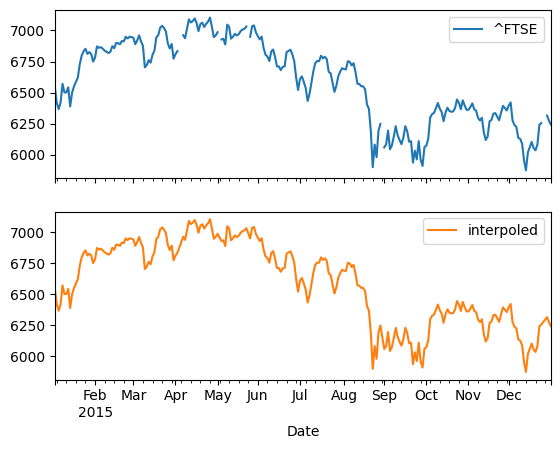

In [37]:
filt_df[['^FTSE', 'interpoled']].plot(subplots=True)
plt.show()

## **Mean, Median or Mode Imputation**

**Method**: Replace missing values with either of the available data

**Pros**: Simple and can be effective for imputing missing values

**Cons**: Ignores variations in time series

In [38]:
mean_value = filt_df['^FTSE'].mean()
mean_value

6590.279447412302

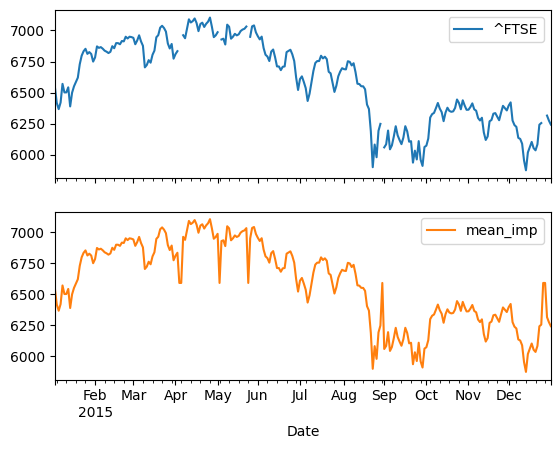

In [40]:
filt_df['mean_imp'] = filt_df['^FTSE'].fillna(mean_value)
filt_df[['^FTSE', 'mean_imp']].plot(subplots = True)
plt.show()

## **Seasonal Imputation**

**Method:** Replacing missing values with the corresponding value from the same season in previous or subsequent years.

**Pros:** Captures seasonality in the data

**Cons:** Requires sufficien historical for the same reason

In [41]:
filt_df['seasonal_imp'] = filt_df['^FTSE'].fillna(filt_df.groupby(filt_df.index.month)['^FTSE'].transform('mean'))

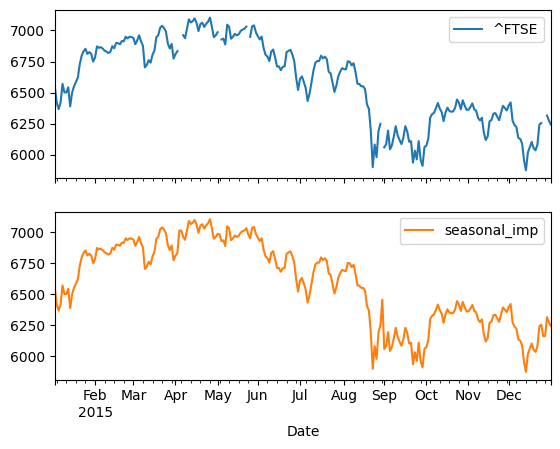

In [42]:
filt_df[['^FTSE', 'seasonal_imp']].plot(subplots=True)
plt.show()

In [43]:
filt_df.columns

Index(['^FTSE', '^GDAXI', '^GSPC', '^N225', 'forward_filled', 'back_filled',
       'interpoled', 'mean_imp', 'seasonal_imp'],
      dtype='object', name='Ticker')

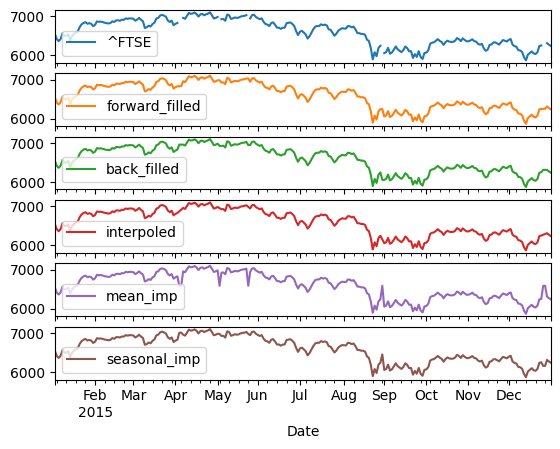

In [45]:
filt_df[['^FTSE', 'forward_filled', 'back_filled',
       'interpoled', 'mean_imp', 'seasonal_imp']].plot(subplots=True)
plt.show()

## **Splitting the data**

In [46]:
data.head()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2014-08-06,6636.200195,9130.040039,NaN,NaN
2014-08-07,6597.399902,9038.969727,1909.569946,15232.370117
2014-08-08,6567.399902,9009.320312,1931.589966,14778.370117
2014-08-11,6632.799805,9180.740234,1936.920044,15130.519531
2014-08-12,6632.399902,9069.469727,1933.750000,15161.309570


In [53]:
size = int(len(data)* 0.8)
size

2083

In [54]:
df_train = data.iloc[:size]
df_test = data.iloc[size:]

In [57]:
print(df_train.shape)
print(df_test.shape)

(2083, 4)
(521, 4)


In [58]:
df_train.tail()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2022-08-02,7409.100098,13449.200195,4091.189941,27594.730469
2022-08-03,7445.700195,13587.559570,4155.169922,27741.900391
2022-08-04,7448.100098,13662.679688,4151.939941,27932.199219
2022-08-05,7439.700195,13573.929688,4145.189941,28175.869141
2022-08-08,7482.399902,13687.690430,4140.060059,28249.240234


In [59]:
df_test.head()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2022-08-09,7488.200195,13534.969727,4122.470215,27999.960938
2022-08-10,7507.100098,13700.929688,4210.240234,27819.330078
2022-08-11,7465.899902,13694.509766,4207.270020,NaN
2022-08-12,7500.899902,13795.849609,4280.149902,28546.980469
2022-08-15,7509.200195,13816.610352,4297.140137,28871.779297


## **White Noise**

In [64]:
#Pick a stock
nikkei = data['^N225']
nikkei.head()

Date
2014-08-06             NaN
2014-08-07    15232.370117
2014-08-08    14778.370117
2014-08-11    15130.519531
2014-08-12    15161.309570
Name: ^N225, dtype: float64

In [65]:
data.columns

Index(['^FTSE', '^GDAXI', '^GSPC', '^N225'], dtype='object', name='Ticker')

In [66]:
#np.random.normal(mean, std_dev, num_samples)
#Generate white noise corresponding to Nikki

In [68]:
white_noise = np.random.normal(data['^N225'].mean(), data['^N225'].std(), size = len(data))
data['white_noise'] = white_noise

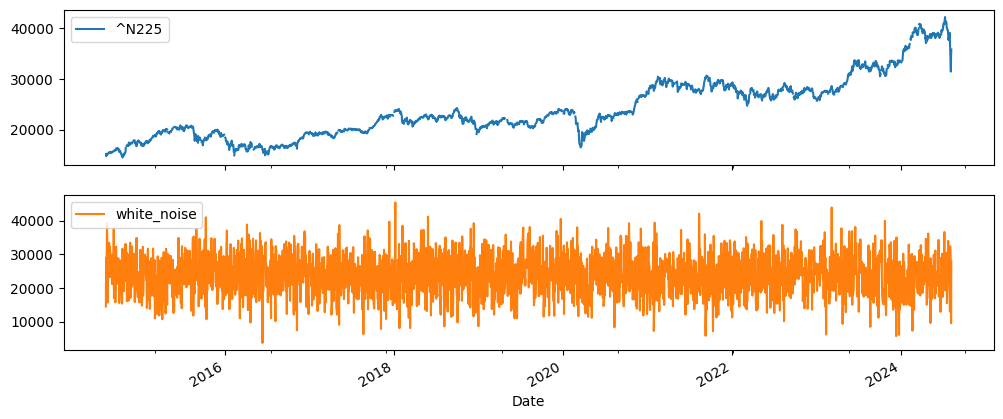

In [69]:
data[['^N225', 'white_noise']].plot(figsize=(12, 5), subplots=True)
plt.show()